# Homework 2: Neural Network Fitting

## Table of Contents
- [0 - Packages](#0)
- [1 - Homework Requirements](#1)
    - [1.1 - Overall](#1-1)
    - [1.2 - Purpose](#1-2)
    - [1.3 - Requirements](#1-3)
    - [1.4 - Supplementary Materials](#1-4)
- [2 - A Naive General Deep NN Framework](#2)
<!--     - [3.1 - ](#2-1)
    - [3.2 - ](#2-2) -->
- [4 - Single Hidden Layers RBF NN](#4)
<!--     - [4.1 -](#4-1)
    - [4.2 - ](#4-2) -->
- [5 - Reference](#5)

<a name='0'></a>
## 0. Package and Testing Data

In [2]:
# Pakages
import numpy as np
import matplotlib.pyplot as plt

# # Integrated framework
# import Interpolation
# import Fitting

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from util import util

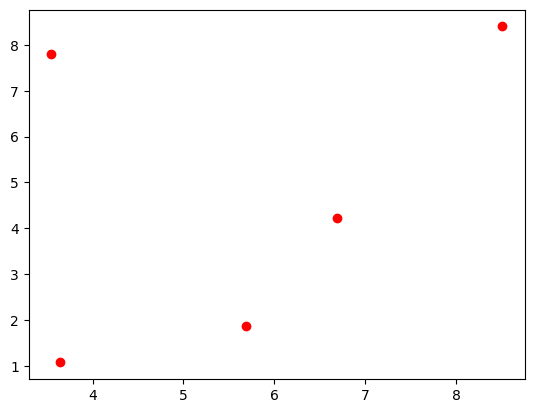

In [3]:
# Testing data size
num_point = 5

# Points for testing
x_sample = np.random.rand(num_point)*10
y_sample = np.random.rand(num_point)*10

# The boundary
xmin = np.min(x_sample)
xmax = np.max(x_sample)
x_range = np.linspace(xmin, xmax, 1000)

# Plot
plt.plot(x_sample, y_sample, 'o', color='r')
plt.show()

## 1. Homework 2 Requirements

### 1.1. Overall

- Use the RBF neural network function to fit the data

  > Still limited to function scenarios

- Compare with the methods in Homework 1

### 1.2. Purpose

- Understand neural network optimization
- Learn to optimize with TensorFlow

### 1.3. Requirements

This assignment is recommended to be completed with TensorFlow in Python, but other languages or frameworks can also be used.

Deadline: Evening of October 24, 2020

### 1.4. Supplementary Materials

[TensorFlow Official Website](https://www.tensorflow.org): Available in Chinese, comprehensive resources (requires circumvention)

[Jike Academy TensorFlow Installation Tutorial](https://wiki.jikexueyuan.com/project/tensorflow-zh/get_started/os_setup.html): Provides installation methods via Pip, Docker, Virtualenv, Anaconda or source code compilation. For beginners, [Anaconda](https://www.anaconda.com/) is recommended for easy management and switching between different versions of Python or TensorFlow and other Python libraries (Anaconda Navigator->Environments). If you install TensorFlow with Anaconda, you can directly use the accompanying [Spyder](https://pypi.org/project/spyder/) IDE (Anaconda Navigator->Home->Spyder)

Python Video Tutorial: [Qizhi Lecture Hall 2020 Python](https://www.bilibili.com/video/av327814069) , [Morvan Python Tutorial](https://www.bilibili.com/video/BV1wW411Y7ai) 

TensorFlow Video Tutorial: [Building Your Own Neural Network with TensorFlow (Morvan Python Tutorial)](https://www.bilibili.com/video/BV1Lx411j7ws) 

RBF Neural Network Reference: [TensorFlow implementation of Radial Basis Function (RBF) Neural Networks](https://blog.csdn.net/Luqiang_Shi/article/details/84894636), you can only do single hidden layer


# 作业 2

## 任务

- 使用 RBF 神经网络函数来拟合数据

  > 仍限制在函数情形

- 与作业 1 的方法比较

## 目的

- 理解神经网络优化
- 学习使用 TensorFlow 来优化

## 要求

此次作业建议使用 python 下的 TensorFlow 完成，也可用其他语言其他框架

Deadline：2020 年 10 月 24 日晚

## 补充资料

[TensorFlow官网](https://www.tensorflow.org)：有中文，资料很全（需要科学上网 fq）

[极客学院TensorFlow安装教程](https://wiki.jikexueyuan.com/project/tensorflow-zh/get_started/os_setup.html)：提供 Pip, Docker, Virtualenv, Anaconda 或 源码编译的方法安装。小白推荐 [Anaconda](https://www.anaconda.com/)，方便管理与切换不同版本 Python 或 TensorFlow 等 Python 库（Anaconda Navigator->Enviorenments）.若使用 Anaconda 安装 TensorFlow，可以直接使用 Anaconda 附带的[Spyder](https://pypi.org/project/spyder/) IDE（Anaconda Navigator->Home->Spyder）

Python视频教程：[求知讲堂2020python](https://www.bilibili.com/video/av327814069) , [莫烦 Python 教程](https://www.bilibili.com/video/BV1wW411Y7ai) 

TensorFlow视频教程：[Tensorflow 搭建自己的神经网络 (莫烦 Python 教程)](https://www.bilibili.com/video/BV1Lx411j7ws) 

RBF神经网络参考：[径向基（RBF）神经网络的tensorflow实现](https://blog.csdn.net/Luqiang_Shi/article/details/84894636)，可只做单隐层

In [79]:
class NN:
    def __init__(self, X, Y, layer_dims=[1, 1], activation_dims=[], learning_rate=0.01, num_iter=1000):
        self.L = len(activation_dims)
        self.activations = activation_dims
        self.X = X
        self.Y = Y
        self.loss = 999999
        self.lr = learning_rate
        self.num_iter = num_iter
        
        # Forward propagation
        self.W = [None]*self.L
        self.b = [None]*self.L
        self.Z = [None]*self.L
        self.A = [None]*(self.L+1)
        self.A[0] = X
        # Backward propagation
        self.dW = [None]*self.L
        self.db = [None]*self.L
        self.dZ = [None]*self.L
        self.dA = [None]*(self.L+1)
        
        for l in range(0, self.L):
            self.W[l] = np.random.randn(layer_dims[l+1], layer_dims[l]) * 0.01
            self.b[l] = np.zeros((layer_dims[l+1], 1))
        
    def reset(self):
        self.W.clear()
        self.b.clear()
        self.Z.clear()
        
        self.dW.clear()
        self.db.clear()
        self.dZ.clear()
        self.dA.clear()
        
        for l in range(0, L):
            self.W.append(np.random.randn(layer_dims[l+1], layer_dims[l]) * 0.01)
            self.b.append(np.zeros((layer_dims[l+1], 1)))
            self.activation.append(activation_dims[l])
            
    @staticmethod
    def activation_gaussian(Z):
        return np.exp(-Z**2 / 2)
    
    def loss_MSE(self):
        self.loss = np.sum(np.power(self.A[self.L]-self.Y, 2))
    
    def forward_propagation(self):
        for l in range(0, self.L):
            self.Z[l] = np.dot(self.W[l], self.A[l]) + self.b[l]
            
            if(self.activations[l]=="gaussian"):
                self.A[l+1] = self.activation_gaussian(Z[l])
            else:
                self.A[l+1] = self.Z[l]
                
    def backward_propagation(self):
        self.dA[self.L] = 2*self.A[self.L]-2*self.Y
        for l in reversed(range(self.L)):
            
            m = self.A[l].shape[1]
            
            if(self.activations[l]=="gaussian"):
                self.dZ[l] = np.dot(self.dA[l+1], -np.dot(self.Z[l], np.exp(-np.square(self.Z[l])/2).T).T)
            else:
                self.dZ[l] = self.dA[l+1]
                
            print("layer ", l, ": ", self.dZ[l].shape == self.Z[l].shape)
            
            self.dW[l] = np.dot(self.dZ[l], self.A[l].T) / m
            self.db[l] = np.sum(self.dZ[l], axis=1, keepdims=True) / m
            self.dA[l] = np.dot(self.W[l].T, self.dZ[l])
            
    def update_parameters(self):
        for l in range(self.L):
            self.W[l] = self.W[l] - self.lr * self.dW[l]
            self.b[l] = self.b[l] - self.lr * self.db[l]
    
    def train(self):
        for i in range(self.num_iter):
            self.forward_propagation()
            self.loss_MSE()
            self.backward_propagation()
            self.update_parameters()
    
    def train_one_round(self):
        self.forward_propagation()
        self.loss_MSE()
        self.backward_propagation()
        self.update_parameters()

In [80]:
test = NN(np.array([x_sample]), np.array(y_sample), layer_dims=[1, 1], activation_dims=["default"])

In [81]:
test.train_one_round()

layer  0 :  True


In [78]:
test.L

1

In [77]:
test.dW

[None]

In [63]:
test.A[0].shape

(1, 5)

In [82]:
test.loss

151.77675436504146

In [83]:
test.W

[array([[0.57054661]])]